# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports - I had to alter this because of whatever error prevents what I install in my environments
# showing up in my notebooks. As far as I can tell everything is properly installed in my base environment.

import os
import pandas as pd
from dotenv import load_dotenv
! pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
!pip install newsapi-python
from newsapi import NewsApiClient

! python -m pip install -U pip
! python -m pip install -U matplotlib

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aaronbsechler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Requirement already up-to-date: pip in /Users/aaronbsechler/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages (20.2.3)
Requirement already up-to-date: matplotlib in /Users/aaronbsechler/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages (3.3.2)


In [10]:
load_dotenv()

True

In [11]:
# Read your api key environment variable

api_key = os.getenv("NEWS_API_KEY")


In [12]:
# Create a newsapi client - Same issue as above.



newsapi = NewsApiClient(api_key=api_key)




In [13]:
newsapi

In [14]:
# Fetch the Bitcoin news articles

bitcoin_articles=newsapi.get_everything(
    q="bitcoin",
    language="en",
)

print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

Total articles about Bitcoin: 3682


In [15]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",)


print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")

Total articles about Ethereum: 1391


In [16]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,compound,date,negative,neutral,positive,text
0,-0.6908,2020-09-10,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,2020-09-08,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,2020-08-23,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [17]:
# Create the ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,compound,date,negative,neutral,positive,text
0,0.7506,2020-09-02,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,2020-09-07,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,2020-09-18,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,2020-08-26,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,2020-08-25,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [18]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [19]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,negative,neutral,positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aaronbsechler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Expand the default stopwords list if necessary - I have to see what the results are before I can do this.

sw_addon = {'said', 'reuters'}


In [62]:
# Complete the tokenizer function
    
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw and word.lower() not in sw_addon]
    return tokens   
    
    

In [63]:
# Create a new tokens column for bitcoin

! pip install --user -U nltk

nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)

bitcoin_df.head()
    

Requirement already up-to-date: nltk in /Users/aaronbsechler/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages (3.5)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aaronbsechler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,compound,date,negative,neutral,positive,text,tokens
0,-0.6908,2020-09-10,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.0000,2020-09-08,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,0.2732,2020-08-23,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, four, month, ago, abolaji, odu..."
4,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, four, month, ago, abolaji, odu..."


In [79]:
# Create a new tokens column for ethereum

ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)

ethereum_df.head()

,compound,date,negative,neutral,positive,text,tokens
0,0.7506,2020-09-02,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[interacted, cryptocurrencies, past, couple, y..."
1,0.0000,2020-09-07,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, dr, complete, stock, cryptocurrency, inve..."
2,0.0000,2020-09-18,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, read, opinions, expressed, en..."
3,0.7579,2020-08-26,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, sound, like, surefire, bet, lend, mon..."
4,0.0000,2020-08-25,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, brooklyn, based, technology, start..."


In [81]:
ethereum_df.dtypes

compound    float64
date         object
negative    float64
neutral     float64
positive    float64
text         object
tokens       object
dtype: object

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [41]:
from collections import Counter
from nltk import ngrams

In [42]:
# Generate the Bitcoin N-grams where N=2

bitcoin_text = bitcoin_df['text'].str.cat()
tokenized_bitcoin_text = tokenizer(bitcoin_text)
bitcoin_bigram_counts = Counter(ngrams(tokenized_bitcoin_text, n=2))
print(dict(bitcoin_bigram_counts))

{('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'fool'): 1, ('fool', 'proof'): 1, ('proof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'char'): 1, ('char', 'alexis'): 1, ('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('bu

In [47]:
# Generate the Ethereum N-grams where N=2

ethereum_text = ethereum_df['text'].str.cat()
tokenized_ethereum_text = tokenizer(ethereum_text)
ethereum_bigram_counts = Counter(ngrams(tokenized_ethereum_text, n=2))
print(dict(ethereum_bigram_counts))

{('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'char'): 1, ('char', 'tl'): 1, ('tl', 'dr'): 1, ('dr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'price'): 1, ('price', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'char'): 1, ('char', 'september'): 2, ('september', 'min'): 2, ('min', 'read'): 2, ('read', '

In [48]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [49]:
# Get the top 10 words for Bitcoin

print(dict(bitcoin_bigram_counts.most_common(10)))

{('getty', 'images'): 3, ('char', 'september'): 2, ('september', 'min'): 2, ('min', 'read'): 2, ('read', 'opinions'): 2, ('opinions', 'expressed'): 2, ('expressed', 'entrepreneur'): 2, ('entrepreneur', 'contributor'): 2, ('satoshi', 'nakaboto'): 2, ('char', 'ethereum'): 2}


In [50]:
# Get the top 10 words for Ethereum

print(dict(ethereum_bigram_counts.most_common(10)))

{('getty', 'images'): 3, ('char', 'september'): 2, ('september', 'min'): 2, ('min', 'read'): 2, ('read', 'opinions'): 2, ('opinions', 'expressed'): 2, ('expressed', 'entrepreneur'): 2, ('entrepreneur', 'contributor'): 2, ('satoshi', 'nakaboto'): 2, ('char', 'ethereum'): 2}


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
! pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

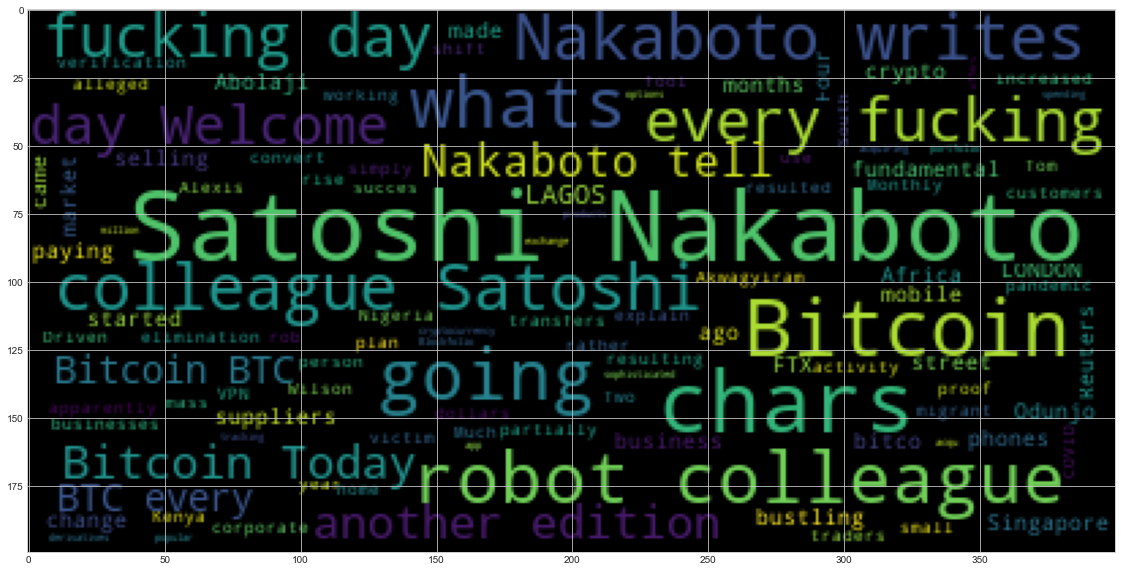

In [82]:
# Generate the Bitcoin word cloud - Franklyn Buyno shared code that helped me fix this.

all_bitcoin_articles = " ".join(bitcoin_df['text'])

input_text = all_bitcoin_articles

wc = WordCloud().generate(input_text)
plt.imshow(wc)

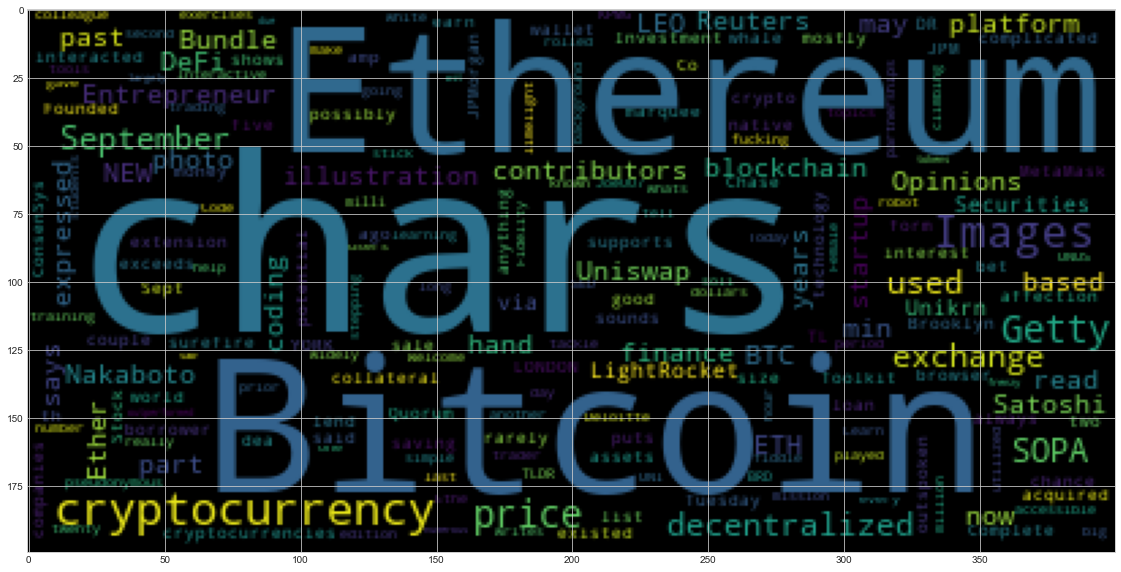

In [83]:
# Generate the Ethereum word cloud

all_ethereum_articles = " ".join(ethereum_df['text'])

input_text = all_ethereum_articles

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [54]:
! pip install -U spacy

import spacy
from spacy import displacy

Requirement already up-to-date: spacy in /Users/aaronbsechler/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages (2.3.2)


In [55]:
# Optional - download a language model for SpaCy

!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [56]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [57]:
# Concatenate all of the bitcoin text together - this is the variable all_bitcoin_articles used above



TypeError: 'builtin_function_or_method' object is not subscriptable

In [84]:
# Run the NER processor on all of the text

bitcoin_doc = nlp(all_bitcoin_articles)

# Add a title to the document

bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [85]:
# Render the visualization

displacy.render(bitcoin_doc, style='ent')

In [86]:
# List all Entities

for entity in bitcoin_doc.ents:
  print(entity.text, ' ', entity.label_)

Two   CARDINAL
Singapore   GPE
365,000 Singapore dollars   MONEY
bitcoin   GPE
Alexis Akwagyiram   PERSON
Tom Wilson   PERSON
Monthly   DATE
Africa   LOC
55%   PERCENT
a year   DATE
Nigeria   GPE
South Africa   GPE
Kenya   GPE
VPN   PRODUCT
LAGOS/LONDON   ORG
Reuters   ORG
Four months ago   DATE
Abolaji Odunjo   ORG
Lagos   GPE
LAGOS/LONDON   ORG
Reuters   ORG
Four months ago   DATE
Abolaji Odunjo   ORG
Lagos   GPE
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
Blockfolio   GPE
FTX   ORG
$150 million   MONEY
Satoshi Nakab

---

## Ethereum NER

In [87]:
# Concatenate all of the bitcoin text together - already done in all_ethereum_articles



In [88]:
# Run the NER processor on all of the text

ethereum_doc = nlp(all_ethereum_articles)

# Add a title to the document

ethereum_doc.user_data["title"] = "Ethereum NER"

In [89]:
# Render the visualization

displacy.render(ethereum_doc, style='ent')

In [90]:
# List all Entities

for entity in ethereum_doc.ents:
  print(entity.text, ' ', entity.label_)

the past couple of years   DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle   ORG
29.46   MONEY
Sept. 7   DATE
97%   PERCENT
September   DATE
18   DATE
2020   DATE
6 min   QUANTITY
five years ago   DATE
Ethereum   ORG
ETH   ORG
LONDON   GPE
Reuters   ORG
about 20%   PERCENT
NEW YORK   PERSON
Reuters   ORG
Brooklyn   GPE
ConsenSys   ORG
JPMorgan Chase &amp   ORG
Quorum   PRODUCT
Tuesday   DATE
Bitcoin   GPE
BTC   ORG
two   CARDINAL
UNUS SED LEO   ORG
LEO   ORG
Satoshi Nakaboto   ORG
Bitcoin   GPE
Bitcoin   GPE
Today   DATE
Satoshi Nakaboto   PERSON
Bitcoin   GPE
second   ORDINAL
one   CARDINAL
bitcoin   GPE
more than 10%   PERCENT
24-hour   TIME
$100 million   MONEY
Deloitte   ORG
KPMG   ORG
Fidelity   ORG
$100 milli   MONEY
Uniswap   ORG
400   CARDINAL
UNI   ORG
September 1   DATE
twenty dollars   MONEY
May   DATE
bitcoin   GPE
DeFi   LOC
DeFi   LOC
Ethereum   ORG
Mateusz Slodkowski/   PERSON
Bitcoin   GPE
Bitcoin   GPE
as high as $12,086   MONEY
Ethereum (ETH   ORG